   #### Exercise : 6 SUPPORT VECTOR MACHINES

- 1.1 Example dataset 1:
- applying linear decision boundary for the support vector machines

In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sci

In [36]:
# loading the datasets
data=sci.loadmat("ex6data1.mat")

In [37]:
# seperating the dependent variables and independent variables
x=data["X"]
y=data["y"]

In [38]:
yy=[]
for i,j in enumerate(y):
    if(j==0):
        yy.append(-1)
    else:
        yy.append(1)

In [44]:
y=np.array(yy)
y=y.reshape((len(y),1))


In [45]:
# printing the shape of the x and y
print("the shape of the data :",x.shape,y.shape)

the shape of the data : (51, 2) (51, 1)


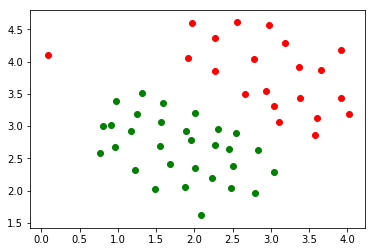

In [46]:
# plotting the dataset
for i,j in enumerate(y):
    if(j==1):
        plt.scatter(x[i,0],x[i,1],color="red")
    else:
        plt.scatter(x[i,0],x[i,1],color="green")
        

#### Building the  SVM model

In [49]:
# splitting the dataset in to the train and test set
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [50]:
# printing the shape of the data
print("the shape of the train set :",x_train.shape,y_train.shape)
print("the shape of the test set :",x_test.shape,y_test.shape)

the shape of the train set : (40, 2) (40, 1)
the shape of the test set : (11, 2) (11, 1)


In [51]:
# building the model
def hypo(x_train,para,bias):
    a=np.dot(x_train,para)+bias
    return 1/(1+np.exp(-a))
def SVM(x_train,y_train,para,bias,c):
    num_iters=500
    for _ in range(num_iters):
        h=hypo(x_train,para,bias)
        tar=h-y_train
        para=para+c*np.dot(x_train.T,tar)+sum(para)
        bias=bias+c*sum(tar)
    return para,bias

In [52]:
c=12
para=np.ones((x_train.shape[1],1))
bias=np.ones((1,1))
p,b=SVM(x_train,y_train,para,bias,c)

In [53]:
b

array([[275999.35273153]])

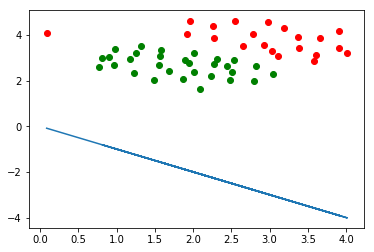

In [54]:
for i,j in enumerate(y):
    if(j==1):
        plt.scatter(x[i,0],x[i,1],color="red")
    else:
        plt.scatter(x[i,0],x[i,1],color="green")
t=x[:,0]
t=t.reshape((x.shape[0],1))
def draw(t):
    bb=b
    bb=bb.reshape((b[0].shape[0],1))
    pp=p[0]
    pp=pp.reshape((p[0].shape[0],1))
    pp1=p[1]
    pp1=pp1.reshape((p[1].shape[0],1))
    return (b-p[0]*t)/p[1]

plt.plot(t,draw(t))

In [55]:
a=b[0]+p[0]*x[:,0]

In [56]:
a=a/p[1]

In [57]:
a.shape

(51,)

#### Defining the SVM by the hinge loss function 

In [359]:
def hypo(x_train,para,bias):
    return np.dot(x_train,para)+bias


def Cost_function(x_train,y_train,para,bias,reg_per):
    h=y_train*hypo(x_train,para,bias)
    k=[]
    for i in h:
        if(i>=1):
            k.append(0)
        else:
            k.append(1)
    kk=(1-h)*k
   # print(h)
    c=reg_per*np.dot(para.T,para)+sum(kk*k)
    c=c.reshape((x_train.shape[0],1))
    return c
def Gradent_descent(x_train,y_train,para,bias,reg_per,learning_rate):
    num_iters=10000
    for _ in range(num_iters):
        for i, x in enumerate(x_train):
            #misclassification
            
            a=np.dot(x_train[i],para)
            
            s=y_train[i]*a
            if (s) < 1:
                x=x_train[i].reshape((2,1))
                #misclassified update for ours weights
                para = para + learning_rate * ( (x * y_train[i]) + (-2  *(1/num_iters)* para) )
                error = 1
            else:
                #correct classification, update our weights
                para = para + learning_rate * (-2  *(1/num_iters)* para)
        bias=bias+learning_rate*(sum(y_train))
    return para,bias
    
def Predict(x_feat,para,bias):  
    p=hypo(x_feat,para,bias)
    k=[]
    for i in p:
        if(i>=0):
            k.append(1)
        else:
            k.append(-1)
    return k
    

In [393]:
learning_rate=0.005
reg_para=1
para=np.ones((x_train.shape[1],1))
bias=np.ones((1,1))
p,b=Gradent_descent(x_train,y_train,para,bias,reg_para,learning_rate)


In [394]:
pre=Predict(x_test,p,b)

In [395]:
pre

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]

In [396]:
y_test

array([[-1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [-1]])

In [397]:
c=Cost_function(x_train,y_train,p,b,reg_para)

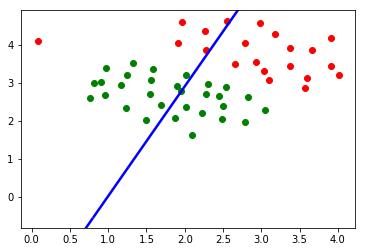

In [398]:
for i,j in enumerate(y):
    if(j==1):
        plt.scatter(x[i,0],x[i,1],color="red")
    else:
        plt.scatter(x[i,0],x[i,1],color="green")
x2=[p[0],p[1],-p[1],p[0]]
x3=[p[0],p[1],p[1],-p[0]]
x2x3=np.array([x2,x3])
X,Y,U,V=zip(*x2x3)
ax=plt.gca()
ax.quiver(X,Y,U,V,scale=0.1, color='blue')

#### Preprocesing Emails

In [402]:
import io

In [403]:
Em=io.open("emailSample1.txt")

In [410]:
for i in Em.readlines():
    print(i)

> Anyone knows how much it costs to host a web portal ?

>

Well, it depends on how many visitors you're expecting.

This can be anywhere from less than 10 bucks a month to a couple of $100. 

You should checkout http://www.rackspace.com/ or perhaps Amazon EC2 

if youre running something big..



To unsubscribe yourself from this mailing list, send an email to:

groupname-unsubscribe@egroups.com



